In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
import csv
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

ws = gc.open_by_key('14Izy3f3EE_IXcRt1R6xWdvSoJZ1p5ymSCJMi7K0dns8')
ws=ws.worksheet("number_of_samples")

# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
result=pd.DataFrame.from_records(rows)
print(result)

# file_info=pd.read_csv("/content/drive/MyDrive/deepLearning/cars_classification/dataset/num_of_sample.csv")

[['', 'Name of class', 'Number of files'], ['0', 'bmw serie 1', '82'], ['1', 'chevrolet spark', '108'], ['2', 'chevroulet aveo', '129'], ['3', 'clio', '344'], ['4', 'duster', '280'], ['5', 'Golf', '160'], ['6', 'hyundai i10', '130'], ['7', 'hyundai tucson', '128'], ['8', 'logan', '112'], ['9', 'megane', '280'], ['10', 'mercedes class a', '84'], ['11', 'nemo citroen', '80'], ['12', 'octavia', '156'], ['13', 'picanto', '178'], ['14', 'polo', '132'], ['15', 'sandero', '260'], ['16', 'seat ibiza', '100'], ['17', 'symbol', '158'], ['18', 'toyota corolla', '150'], ['19', 'volkswagen tiguan', '184']]
     0                  1                2
0           Name of class  Number of files
1    0        bmw serie 1               82
2    1    chevrolet spark              108
3    2    chevroulet aveo              129
4    3               clio              344
5    4             duster              280
6    5               Golf              160
7    6        hyundai i10              130
8    7     h

In [17]:
new_header = result.iloc[0] #grab the first row for the header
result = result[1:] #take the data less the header row
result.columns = new_header
result.rename(columns = {'':'code'}, inplace = True)
print((result))

0  code      Name of class Number of files
1     0        bmw serie 1              82
2     1    chevrolet spark             108
3     2    chevroulet aveo             129
4     3               clio             344
5     4             duster             280
6     5               Golf             160
7     6        hyundai i10             130
8     7     hyundai tucson             128
9     8              logan             112
10    9             megane             280
11   10   mercedes class a              84
12   11       nemo citroen              80
13   12            octavia             156
14   13            picanto             178
15   14               polo             132
16   15            sandero             260
17   16         seat ibiza             100
18   17             symbol             158
19   18     toyota corolla             150
20   19  volkswagen tiguan             184


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
result={'Name of class':list(result['Name of class']),'Number of files':list(result['Number of files'].astype(int)),'code':list(result['code'].astype(int))}

In [19]:

result=pd.DataFrame(result)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name of class    20 non-null     object
 1   Number of files  20 non-null     int64 
 2   code             20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


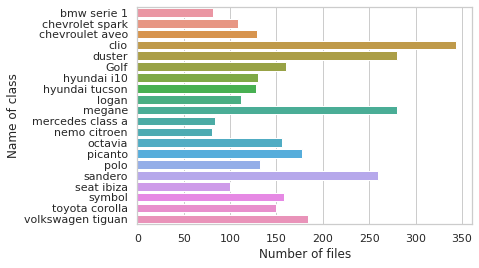

In [ ]:
sns.barplot(data=result, x="Number of files", y="Name of class")

In [ ]:
flat_list = list(result["Name of class"])
print(flat_list)

codes = dict(zip(result["Name of class"], result["code"]))
codes

['bmw serie 1', 'chevrolet spark', 'chevroulet aveo', 'clio', 'duster', 'Golf', 'hyundai i10', 'hyundai tucson', 'logan', 'megane', 'mercedes class a', 'nemo citroen', 'octavia', 'picanto', 'polo', 'sandero', 'seat ibiza', 'symbol', 'toyota corolla', 'volkswagen tiguan']


{'bmw serie 1': 0,
 'chevrolet spark': 1,
 'chevroulet aveo': 2,
 'clio': 3,
 'duster': 4,
 'Golf': 5,
 'hyundai i10': 6,
 'hyundai tucson': 7,
 'logan': 8,
 'megane': 9,
 'mercedes class a': 10,
 'nemo citroen': 11,
 'octavia': 12,
 'picanto': 13,
 'polo': 14,
 'sandero': 15,
 'seat ibiza': 16,
 'symbol': 17,
 'toyota corolla': 18,
 'volkswagen tiguan': 19}

In [ ]:
def getcode(n) : 
    for x , y in codes.items() : 
        if n == y : 
            return x  

In [ ]:
input_folder = "/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA"

for subdir, dirs, files in os.walk(input_folder):
    for file in files:
        print(os.path.join(subdir, file))

/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back472.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back475.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back474.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back476.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back477.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back478.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back479.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back480.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back481.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back482.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf/back483.jpg
/content/drive/MyDrive/deepLearning/car_classification/dataset/DA

Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA 0
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf 133
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/bmw serie 1 66
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/chevrolet spark 104
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/chevroulet aveo 115
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/clio 278
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/duster 235
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/hyundai i10 118
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/hyundai tucson 118
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/logan 48
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/megane 235
F

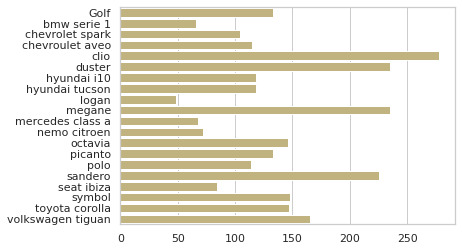

In [ ]:
N = 0  # total files
Number_of_files = []
for subdir, dirs, files in os.walk(input_folder):
    N_c = len(files)
    N += N_c
    print ("Files in ", subdir, N_c)
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print( "Total Files ",N)

#print(Number_of_files)
Directory_Name = os.listdir(input_folder)
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="y")


In [ ]:
fnames = os.listdir(input_folder)
fnames = sorted(fnames)
num_files = len(fnames)
images_list = []
obj = {}
i = 0

    
while i < num_files:
    images_list = []
    files= os.listdir(input_folder+'/'+fnames[i])
    for file in files:
      images_list.append(os.path.join(input_folder+'/'+fnames[i], file))
    obj[fnames[i]] = images_list 
    i += 1
    
obj.keys()  

dict_keys(['Golf', 'bmw serie 1', 'chevrolet spark', 'chevroulet aveo', 'clio', 'duster', 'hyundai i10', 'hyundai tucson', 'logan', 'megane', 'mercedes class a', 'nemo citroen', 'octavia', 'picanto', 'polo', 'sandero', 'seat ibiza', 'symbol', 'toyota corolla', 'volkswagen tiguan'])

In [ ]:
# mohamed kamel

# pip install imagehash

In [ ]:
remove image duplication in python
pip install imagehash
from PIL import Image
import imagehash

# image_fns : List of training image files
for key, value in obj.items():
 image_fns = value
 
 #print(image_fns)
 img_hashes = {}

 for img_fn in sorted(image_fns):
    hash = imagehash.average_hash(Image.open(img_fn))
    if hash in img_hashes:
        #print( '{} duplicate of {}'.format(img_fn, img_hashes[hash]) )
        #print('************************************************************')
        os.remove(img_fn)
        
    else:
        img_hashes[hash] = img_fn

Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA 0
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/Golf 133
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/bmw serie 1 66
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/chevrolet spark 104
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/chevroulet aveo 115
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/clio 278
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/duster 235
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/hyundai i10 118
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/hyundai tucson 118
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/logan 48
Files in  /content/drive/MyDrive/deepLearning/car_classification/dataset/DATA/megane 235
F

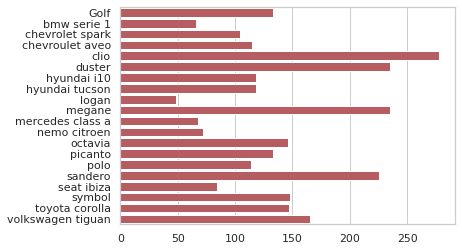

In [ ]:
# list total files, average per class, and any class has < 100 images
a=[]
N = 0  # total files
Number_of_files = []
for subdir, dirs, files in os.walk(input_folder):
    N_c = len(files)
    N += N_c
    print ("Files in ", subdir, N_c)
    if N_c>0 and N_c<100: 
     a.append(subdir)
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print( "Total Files ",N)
print( "Average Files ",N/20)
print(a)

#print(Number_of_files)
Directory_Name = os.listdir(input_folder)
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="r")


In [ ]:
# pip install split-folders

In [ ]:
import splitfolders
input_folder = "/content/drive/MyDrive/deepLearning/cars_classification/dataset/DATA"


output = "/content/drive/MyDrive/deepLearning/cars_classification/dataset/DATA2"  #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .2, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

In [ ]:
trainpath = "/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA2/"
testpath = "/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA2/"
predpath = "/content/drive/MyDrive/deepLearning/car_classification/dataset/DATA2/"

For training data , found 132 in folder volkswagen tiguan
For training data , found 117 in folder toyota corolla
For training data , found 118 in folder symbol
For training data , found 91 in folder polo
For training data , found 180 in folder sandero
For training data , found 67 in folder seat ibiza
For training data , found 116 in folder octavia
For training data , found 106 in folder picanto
For training data , found 57 in folder nemo citroen
For training data , found 188 in folder megane
For training data , found 54 in folder mercedes class a
For training data , found 38 in folder logan
For training data , found 94 in folder hyundai tucson
For training data , found 94 in folder hyundai i10
For training data , found 188 in folder duster
For training data , found 222 in folder clio
For training data , found 92 in folder chevroulet aveo
For training data , found 52 in folder bmw serie 1
For training data , found 83 in folder chevrolet spark
For training data , found 106 in folder Golf

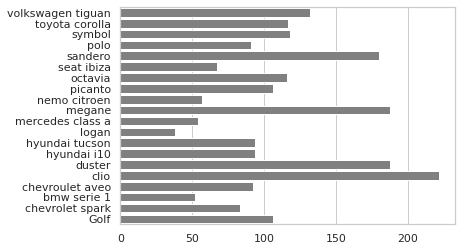

In [ ]:
N=0
Number_of_files = []
for folder in  os.listdir(trainpath + 'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For training data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(trainpath + 'train')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="gray")


For training data , found 17 in folder volkswagen tiguan
For training data , found 16 in folder toyota corolla
For training data , found 16 in folder symbol
For training data , found 13 in folder polo
For training data , found 23 in folder sandero
For training data , found 10 in folder seat ibiza
For training data , found 16 in folder octavia
For training data , found 14 in folder picanto
For training data , found 8 in folder nemo citroen
For training data , found 24 in folder megane
For training data , found 8 in folder mercedes class a
For training data , found 6 in folder logan
For training data , found 13 in folder hyundai tucson
For training data , found 13 in folder hyundai i10
For training data , found 24 in folder duster
For training data , found 29 in folder clio
For training data , found 12 in folder chevroulet aveo
For training data , found 8 in folder bmw serie 1
For training data , found 12 in folder chevrolet spark
For training data , found 14 in folder Golf
296
14.8
    

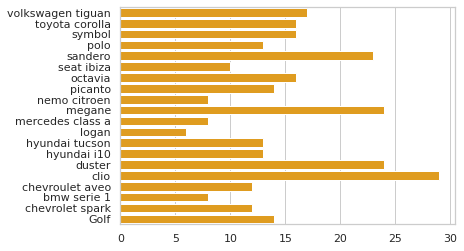

In [ ]:
#### sara 

N=0
Number_of_files = []
for folder in  os.listdir(testpath + 'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For training data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(testpath + 'test')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="orange")


For prediction data , found 33 in folder volkswagen tiguan
For prediction data , found 29 in folder toyota corolla
For prediction data , found 29 in folder symbol
For prediction data , found 23 in folder polo
For prediction data , found 45 in folder sandero
For prediction data , found 17 in folder seat ibiza
For prediction data , found 29 in folder octavia
For prediction data , found 26 in folder picanto
For prediction data , found 14 in folder nemo citroen
For prediction data , found 47 in folder megane
For prediction data , found 13 in folder mercedes class a
For prediction data , found 9 in folder logan
For prediction data , found 23 in folder hyundai tucson
For prediction data , found 23 in folder hyundai i10
For prediction data , found 47 in folder duster
For prediction data , found 55 in folder clio
For prediction data , found 23 in folder chevroulet aveo
For prediction data , found 13 in folder bmw serie 1
For prediction data , found 21 in folder chevrolet spark
For prediction d

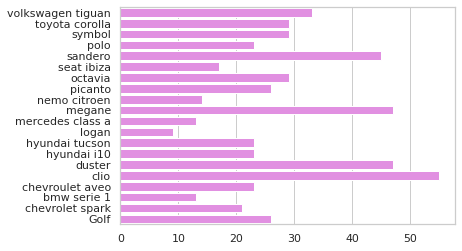

In [ ]:
N=0
Number_of_files = []
for folder in  os.listdir(predpath + 'val') : 
    files = gb.glob(pathname= str( predpath +'val//' + folder + '/*.jpg'))
    N+=len(files)
    print(f'For prediction data , found {len(files)} in folder {folder}')
    if len(files) < 1:
        continue 
    Number_of_files.append(len(files))
print(N)
print(N/20)

#print(Number_of_files)
Directory_Name = os.listdir(predpath + 'val')
#Directory_Name

df = pd.DataFrame({"Directory_Name": Directory_Name,
                   "Number_of_files": Number_of_files})
print(df)

ax = sns.barplot(data = df, x=Number_of_files, y=Directory_Name, orient="h", color="violet")


In [ ]:
size = []
for folder in  os.listdir(trainpath +'train') : 
    files = gb.glob(pathname= str( trainpath +'train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2195
dtype: int64

In [ ]:
size = []
for folder in  os.listdir(testpath +'test') : 
    files = gb.glob(pathname= str( testpath +'test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    296
dtype: int64

In [ ]:
size = []
#files = gb.glob(pathname= str( predpath +'val/*.jpg'))

for folder in  os.listdir(predpath +'val'): 
 files = gb.glob(pathname= str( predpath +'val//'+ folder + '/*.jpg') )
 for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    545
dtype: int64

In [ ]:
s=200
batch_size=64

In [ ]:

### wedad 

model = Sequential()

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(s, s, 3)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(20, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 196, 196, 64)      4864      
                                                                 
 conv2d_9 (Conv2D)           (None, 192, 192, 64)      102464    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 96, 96, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 96, 96, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 94, 94, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                  

In [ ]:

# model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(s, s, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(20, activation='softmax')) # 

# model.summary()
# optimizer=keras.optimizers.RMSprop()

# # #KerasModel.compile(optimizer ='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])




In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
#                                             patience=2, 
#                                             verbose=1, 
#                                             factor=0.5, 
#                                             min_lr=0.00001)
callbacks = [earlystop]


In [ ]:

### mohamed etman 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        trainpath+"/train",
        target_size=(s,s),
        class_mode='categorical',
        # batch_size=batch_size
)

Found 2195 images belonging to 20 classes.


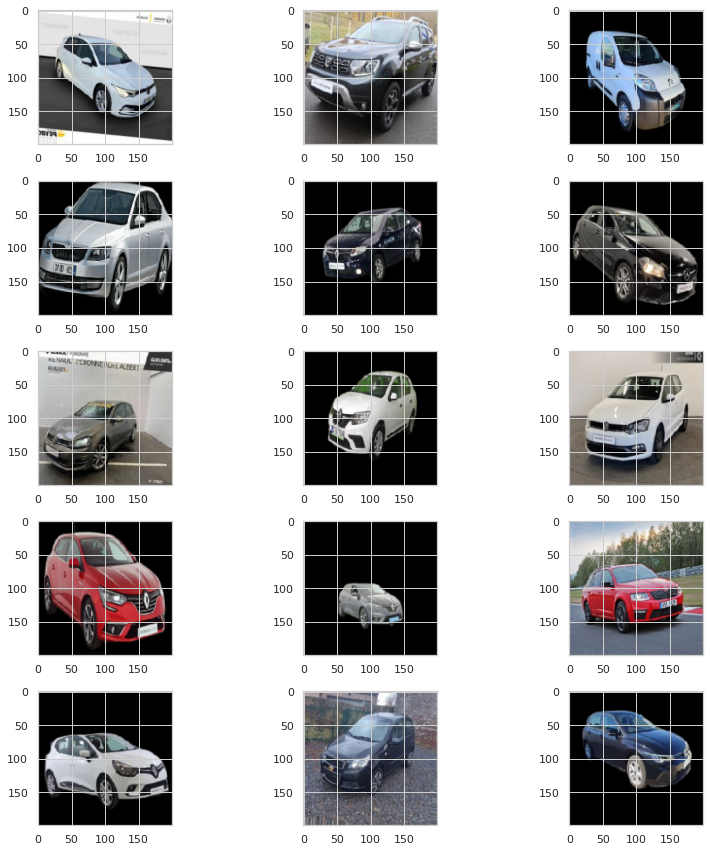

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
   predpath+'/val', 
    target_size=(s,s),
   class_mode='categorical',
    # batch_size=batch_size
)

Found 545 images belonging to 20 classes.


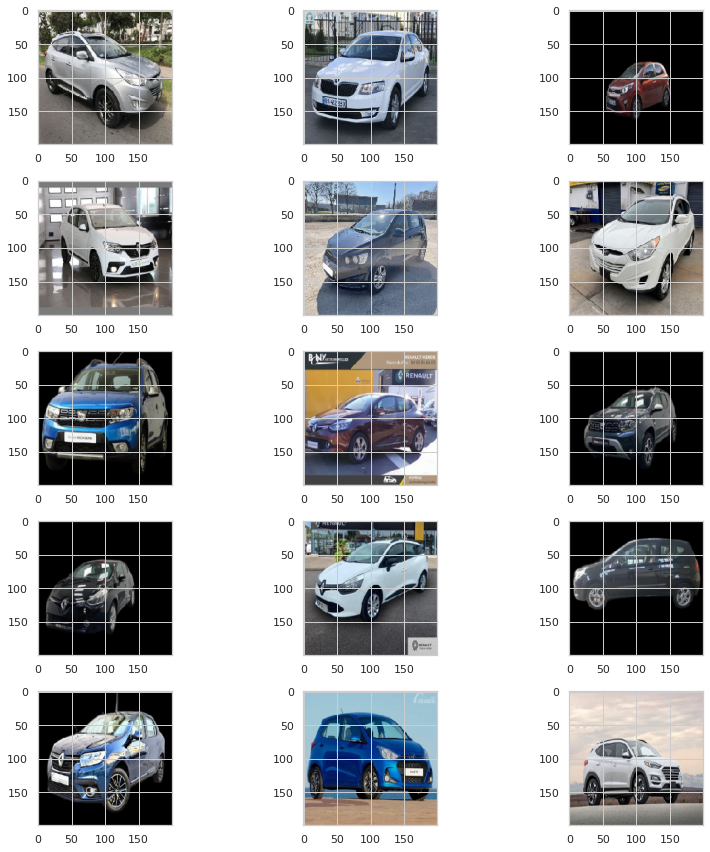

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in validation_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
history = model.fit(
    train_generator, 
    epochs=50,
    validation_data=validation_generator,
    # batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/50
69/69 [==============================] - 28s 396ms/step - loss: 2.9545 - accuracy: 0.0866 - val_loss: 2.9035 - val_accuracy: 0.1009
Epoch 2/50
69/69 [==============================] - 27s 386ms/step - loss: 2.9173 - accuracy: 0.0984 - val_loss: 2.9048 - val_accuracy: 0.1009
Epoch 3/50
69/69 [==============================] - 27s 383ms/step - loss: 2.9119 - accuracy: 0.1057 - val_loss: 2.9213 - val_accuracy: 0.1009
Epoch 4/50
69/69 [==============================] - 27s 396ms/step - loss: 2.9116 - accuracy: 0.0852 - val_loss: 2.8900 - val_accuracy: 0.1009
Epoch 5/50
69/69 [==============================] - 27s 384ms/step - loss: 2.8729 - accuracy: 0.1271 - val_loss: 2.8169 - val_accuracy: 0.1633
Epoch 6/50
69/69 [==============================] - 26s 382ms/step - loss: 2.7561 - accuracy: 0.1513 - val_loss: 2.6759 - val_accuracy: 0.1890
Epoch 7/50
69/69 [==============================] - 26s 382ms/step - loss: 2.6083 - accuracy: 0.1995 - val_loss: 2.4434 - val_accuracy: 0.2440

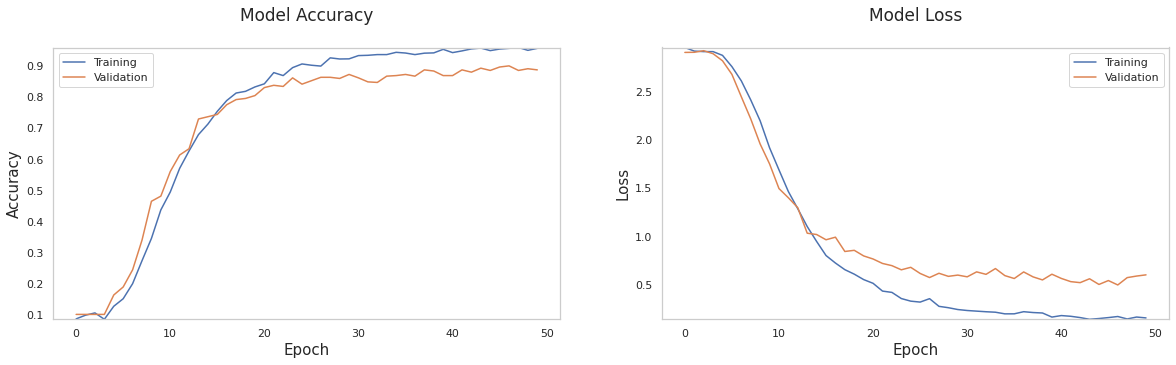

In [ ]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# ax1.plot(history.history['loss'], color='b', label="Training loss")
# ax1.plot(history.history['val_loss'], color='r', label="validation loss")
# ax1.set_xticks(np.arange(1, 50, 1))
# ax1.set_yticks(np.arange(0, 1, 0.1))

# ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
# ax2.set_xticks(np.arange(1, 50, 1))

# legend = plt.legend(loc='best', shadow=True)
# plt.tight_layout()
# plt.show()


# def plot_performance(history=None, figure_directory=None, ):
ylim_pad=[0, 0]
xlabel = 'Epoch'
legends = ['Training', 'Validation']
plt.figure(figsize=(20, 5))
y1 = history.history['accuracy']
y2 = history.history['val_accuracy']
min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]
plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
y1 = history.history['loss']
y2 = history.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Loss\n', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper right')
plt.grid()
plt.show()

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(
    testpath+'/test', 
    target_size=(s,s),
    class_mode='categorical',
    shuffle=False
)

Found 296 images belonging to 20 classes.


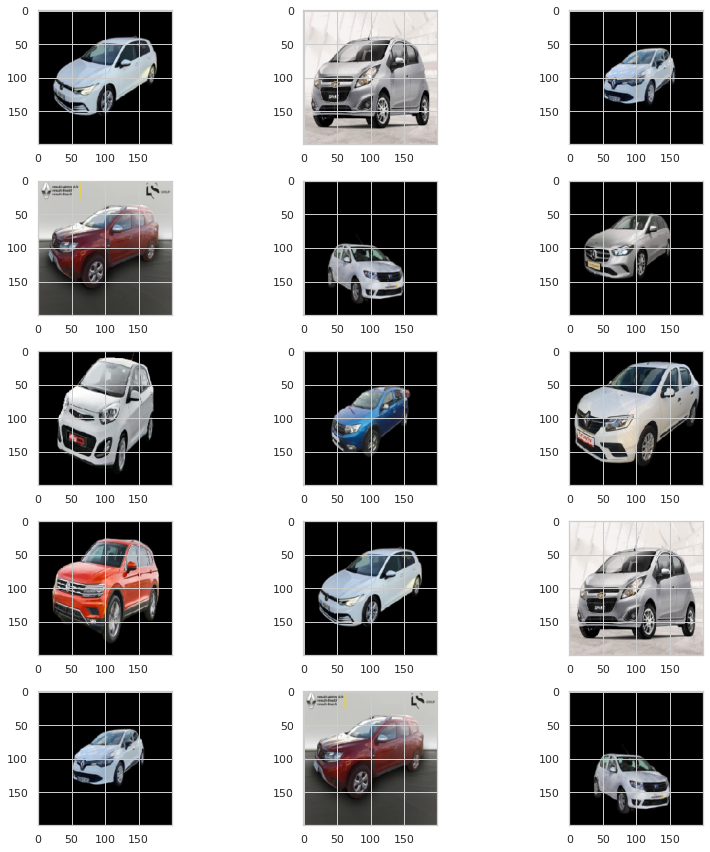

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in test_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
predict = model.predict_generator(test_generator)
predicted_classes = np.argmax(predict, axis=1)

<ipython-input-62-0524b258b557>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator)


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                   precision    recall  f1-score   support

             Golf       0.60      0.43      0.50        14
      bmw serie 1       0.67      0.50      0.57         8
  chevrolet spark       0.80      0.67      0.73        12
  chevroulet aveo       0.73      0.92      0.81        12
             clio       0.76      0.90      0.83        29
           duster       0.83      0.79      0.81        24
      hyundai i10       1.00      0.77      0.87        13
   hyundai tucson       0.86      0.92      0.89        13
            logan       1.00      0.67      0.80         6
           megane       0.89      0.71      0.79        24
 mercedes class a       1.00      0.88      0.93         8
     nemo citroen       0.64      0.88      0.74         8
          octavia       0.82      0.88      0.85        16
          picanto       0.56      0.71      0.63        14
             polo       0.73      0.85      0.79        13
          sandero       0.71      0.65      0.68       

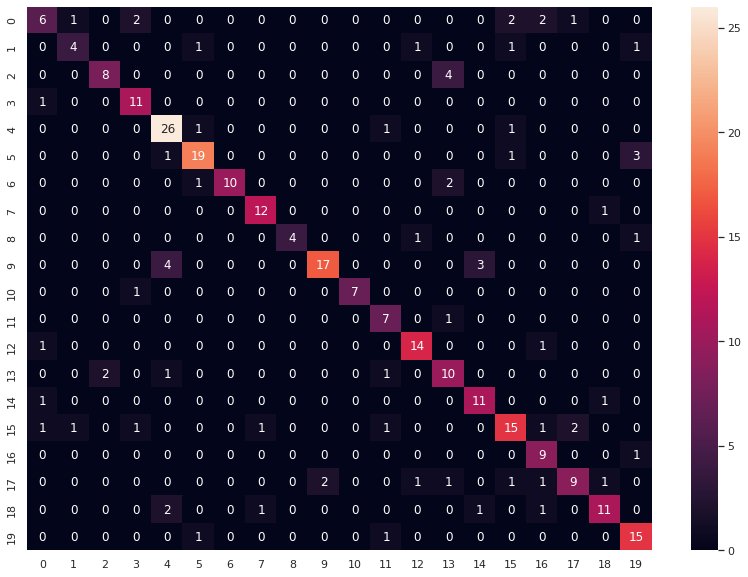

In [ ]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(conf_matrix, annot=True)